A primeira informação é listar as marcas vendidas em São Paulo por quantidade de pedidos, que podem ser representadas em uma tabela. Já a segunda informação é publicar os produtos que são mais vendidos na época de Natal no Brasil todo. Essa última informação é aplicada a todos os estados porque somente o estado de São Paulo pode não trazer uma quantidade relevante de informações.

Vale relembrar que é interessante continuar com as mesmas tabelas já inseridas no banco ('itens_pedidos', 'pedidos', 'produtos', 'vendedores') e também utilizar a mesma função de execução de consulta (sql_df) para resolver os desafios.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

In [17]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [18]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produto = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [19]:
engine = create_engine('sqlite:///:memory:')

In [20]:
pedidos.to_sql('pedidos', engine, index=False)
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)
produto.to_sql('produtos', engine, index=False)

205

In [21]:
def sql_df(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        resultado = consulta.fetchall()
    return pd.DataFrame(resultado, columns=consulta.keys())

In [22]:
pedidos.head(1)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780


In [23]:
itens_pedidos.head(1)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0


In [24]:
vendedores.head(1)

,vendedor_id,nome_vendedor
0,1,Ana Duarte


In [25]:
produto.head(1)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado


listar as marcas vendidas em São Paulo por quantidade de pedidos, que podem ser representadas em uma tabela.

In [35]:
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS Qtd_pedidos
FROM PRODUTOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PRODUTOS.MARCA
ORDER BY Qtd_pedidos DESC
'''

tb1 = sql_df(query).head(10)
tb1

,marca,Qtd_pedidos
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
5,Shoulder,17
6,Sacada,17
7,Forever 21,15
8,Cantão,15
9,Fyi,14


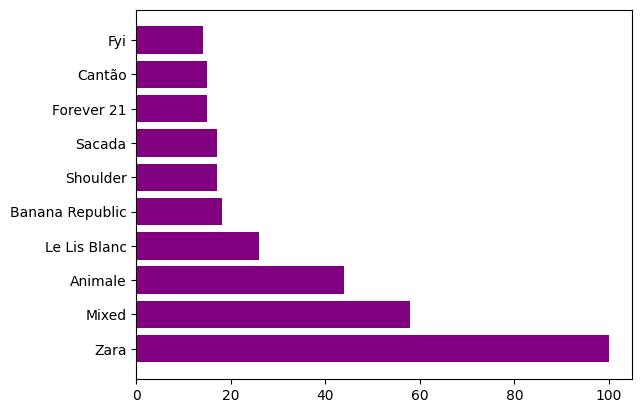

In [42]:
plt.barh(tb1['marca'], tb1['Qtd_pedidos'], color='Purple')
plt.show()

Já a segunda informação é publicar os produtos que são mais vendidos na época de Natal no Brasil todo. Essa última informação é aplicada a todos os estados porque somente o estado de São Paulo pode não trazer uma quantidade relevante de informações.

In [66]:
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS Qtd_pedidos
FROM PRODUTOS
JOIN PEDIDOS ON PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE strftime('%m', data_compra) = '12'
GROUP BY PRODUTOS.MARCA
ORDER BY Qtd_pedidos DESC
'''
tb2 = sql_df(query).head(10)

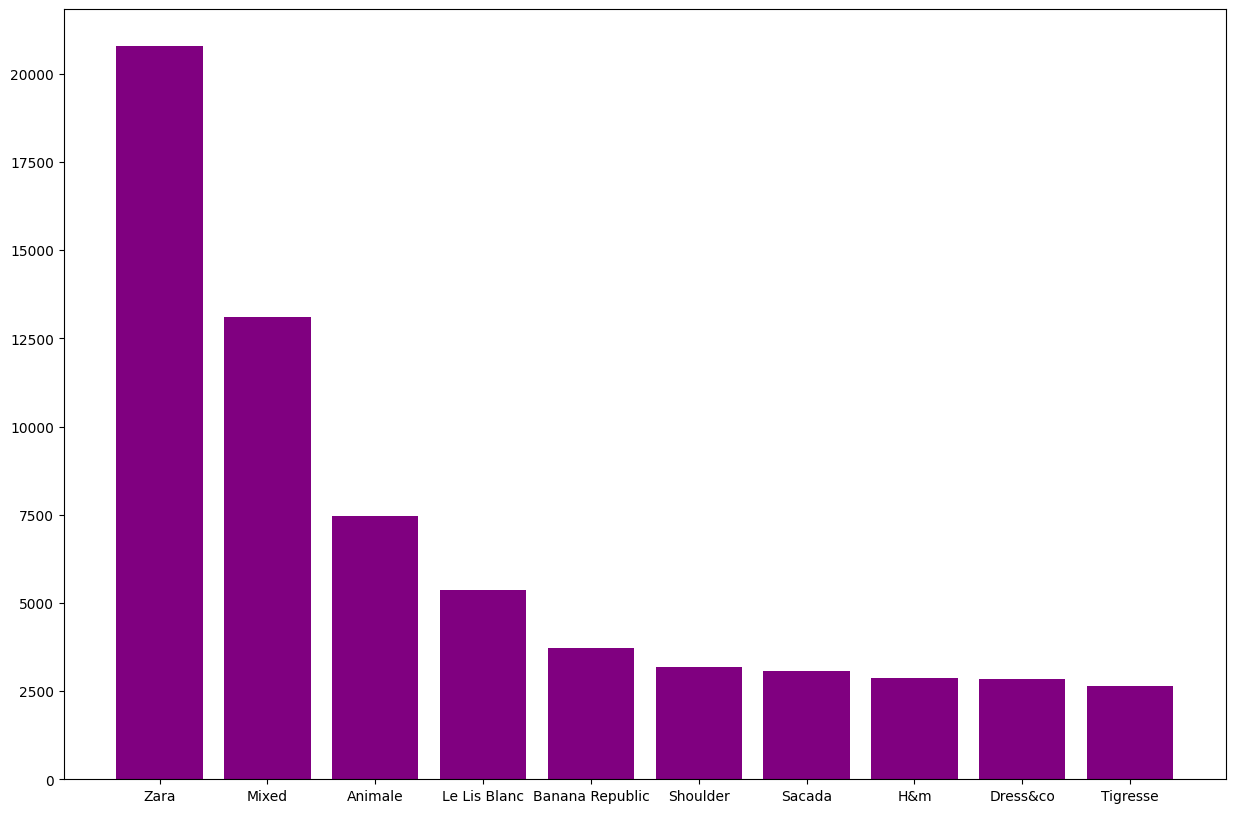

In [65]:
plt.figure(figsize=(15,10))
plt.bar(tb2['marca'], tb2['Qtd_pedidos'], color='Purple')
plt.show()